In [ ]:
# 1. 掛載 Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. 安裝 YOLO 套件
!pip install ultralytics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil

# 建立資料夾結構
os.makedirs('/content/datasets/test/images', exist_ok=True)
os.makedirs('/content/datasets/test/labels', exist_ok=True)

# --- 請修改這裡 ---
# 假設你的 best.pt 在雲端的位置是: /content/drive/MyDrive/best.pt
model_path = '/content/drive/MyDrive/best.pt'

# 假設你在雲端備份的 test 資料夾位置 (裡面要有 images 和 labels 資料夾)
# 如果你是壓縮檔 (zip)，請改用 !unzip 指令解壓縮
# 這裡範例是假設你把 patient0046~0050 的圖片和txt檔都放在雲端的某個資料夾
drive_test_images = '/content/drive/MyDrive/yolo_output/datasets/content/datasets/test/images'
drive_test_labels = '/content/drive/MyDrive/yolo_output/datasets/content/datasets/test/labels'
# -----------------

# 複製資料到 Colab 本機 (如果檔案很多，這步會花一點時間)
if os.path.exists(drive_test_images) and os.path.exists(drive_test_labels):
    print("正在複製圖片...")
    !cp -r "$drive_test_images"/* /content/datasets/test/images/
    print("正在複製標記...")
    !cp -r "$drive_test_labels"/* /content/datasets/test/labels/
    print("資料複製完成！")
else:
    print("找不到雲端路徑，請檢查你的路徑設定是否正確。")

正在複製圖片...
正在複製標記...
資料複製完成！


In [ ]:
import yaml

# 1. 製作 yaml 檔
yaml_content = {
    'path': '/content/datasets',  # 根目錄
    'train': 'test/images',       # 這裡隨便填，因為我們只跑驗證
    'val': 'test/images',         # 這裡隨便填
    'test': 'test/images',        # ★關鍵：這是我們剛複製過來的測試集路徑
    'names': {0: 'Aortic Valve'}  # 類別名稱
}

with open('my_test.yaml', 'w') as f:
    yaml.dump(yaml_content, f)

print("YAML 設定檔已建立。")

# 2. 執行投影片上的指令 (驗證模型)
# model: 指向你雲端的 best.pt
# data: 指向剛建立的 my_test.yaml
# split=test: 指定跑 test 資料集
!yolo detect val model="$model_path" data=my_test.yaml split=test save_txt save_conf

YAML 設定檔已建立。
Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1781.9±392.3 MB/s, size: 108.1 KB)
val: Scanning /content/datasets/test/labels.cache... 327 images, 1490 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1817/1817 19.1Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 114/114 4.6it/s 24.6s
                   all       1817        327      0.838      0.851      0.882      0.563
Speed: 1.4ms preprocess, 5.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
import shutil
from google.colab import files

# 將結果資料夾壓縮成 zip 檔案
output_dir = '/content/runs/detect/val'
zip_filename = 'yolo_val_results.zip'
shutil.make_archive(zip_filename.replace('.zip', ''), 'zip', output_dir)

# 提供下載連結
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🔍 開始分析 1817 張圖片...


  0%|          | 0/1817 [00:00<?, ?it/s]


📸 [檢視] patient0046_0279.png | FN:False, FP:True, Dup:True


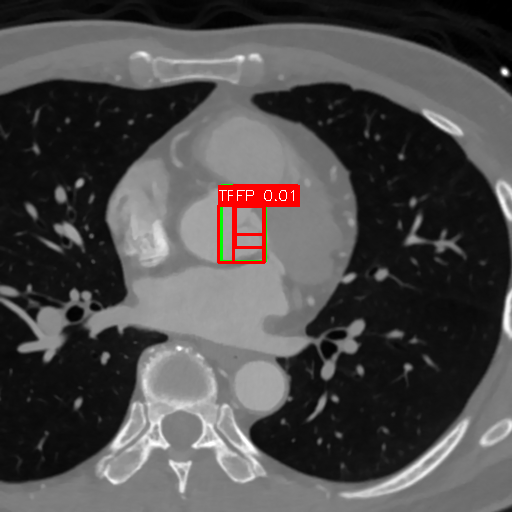


📸 [檢視] patient0047_0196.png | FN:False, FP:True, Dup:False


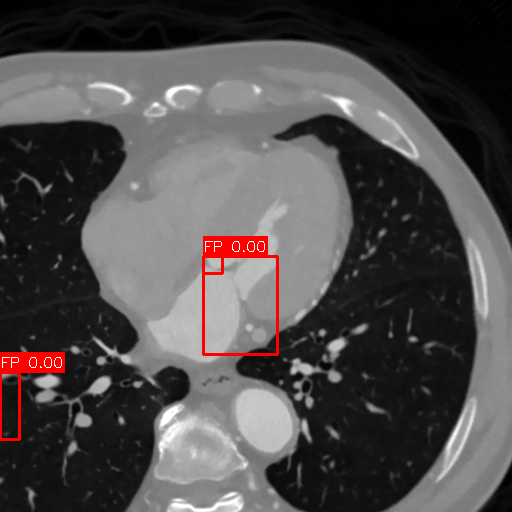


📸 [檢視] patient0046_0100.png | FN:False, FP:True, Dup:False


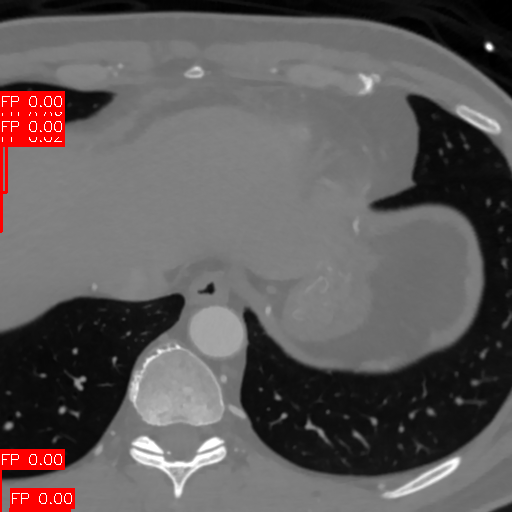


📸 [檢視] patient0049_0239.png | FN:False, FP:True, Dup:False


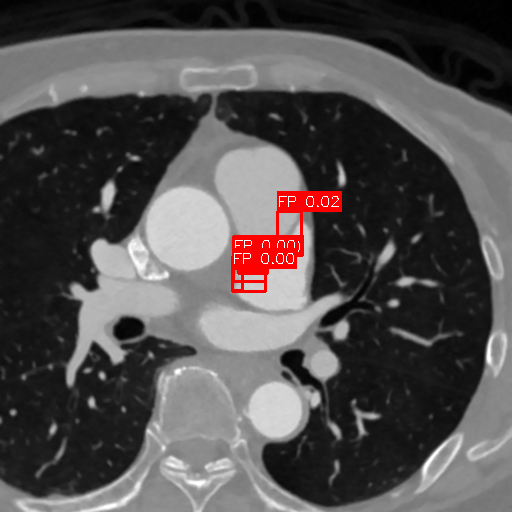


📸 [檢視] patient0047_0094.png | FN:False, FP:True, Dup:False


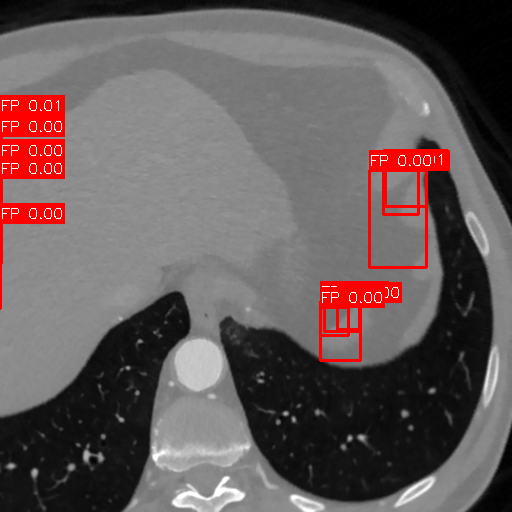


# YOLO 評估摘要

IoU 閾值: 0.5
影像數量: 1817

GT 框數: 327
預測框數: 9693

True Positive (TP): 317, TP 平均 IoU: 0.8099
False Positive (FP): 9376
多餘框數量 (Duplicate): 140
False Negative (FN): 10

## 風險影像快速檢視

含 FP 的圖片: patient0046_0279.png, patient0047_0196.png, patient0046_0100.png, patient0049_0239.png, patient0047_0094.png, patient0048_0170.png, patient0050_0233.png, patient0046_0167.png, patient0049_0124.png, patient0046_0209.png ...
含 FN 的圖片: patient0050_0293.png, patient0050_0292.png, patient0050_0242.png, patient0050_0297.png, patient0049_0187.png, patient0050_0295.png, patient0049_0186.png, patient0049_0188.png, patient0049_0189.png, patient0050_0312.png
有多框問題: patient0046_0279.png (1), patient0048_0256.png (2), patient0050_0305.png (1), patient0047_0269.png (2), patient0048_0232.png (2), patient0048_0244.png (1), patient0049_0171.png (1), patient0047_0253.png (1), patient0048_0246.png (1), patient0048_0255.png (1) ...
僅有 TP 的圖片: patient0046_0264.png, patient0046_0255.png, patient0048_0202.png, 

In [ ]:
import os
import cv2
import yaml
import numpy as np
import glob
from tqdm.notebook import tqdm
from datetime import datetime
from google.colab.patches import cv2_imshow

# ==========================================
# 1. 設定區域
# ==========================================
CONFIG = {
    "YAML_PATH": "/content/aortic_valve_colab.yaml",
    "TEST_IMAGES_DIR": "/content/datasets/test/images",
    "GT_LABELS_DIR": "/content/datasets/test/labels",
    "PRED_LABELS_DIR": "/content/runs/detect/val/labels",
    "OUTPUT_DIR": "/content/analysis_output",
    "IOU_THRESHOLD": 0.5,
    "MAX_DISPLAY_COLAB": 5  # Colab 顯示上限
}

# 顏色定義 (BGR)
COLOR_GT = (0, 255, 0)      # 綠色: 標準答案
COLOR_PRED = (0, 0, 255)    # 紅色: 預測結果 (FP)
COLOR_FN = (0, 255, 255)    # 黃色: 漏檢 (FN)
COLOR_TEXT = (255, 255, 255)

# ==========================================
# 2. 工具函數 (已修正 unpacking 錯誤)
# ==========================================
def yolo_to_bbox(line, img_w, img_h):
    parts = list(map(float, line.strip().split()))

    # 防呆機制：如果長度小於 5，代表資料有問題，回傳空值
    if len(parts) < 5:
        return -1, [0, 0, 0, 0], []

    cls_id = int(parts[0])

    # --- 修正點：強制只取索引 1 到 4 作為座標，避免因為有信心分數導致錯誤 ---
    x_c, y_c, w, h = parts[1:5]

    x1 = int((x_c - w / 2) * img_w)
    y1 = int((y_c - h / 2) * img_h)
    x2 = int((x_c + w / 2) * img_w)
    y2 = int((y_c + h / 2) * img_h)

    # 剩下的部分 (如果有) 就是信心分數
    rest = parts[5:] if len(parts) > 5 else []

    return cls_id, [x1, y1, x2, y2], rest

def calculate_iou(box1, box2):
    x1_max = max(box1[0], box2[0])
    y1_max = max(box1[1], box2[1])
    x2_min = min(box1[2], box2[2])
    y2_min = min(box1[3], box2[3])
    inter_w = max(0, x2_min - x1_max)
    inter_h = max(0, y2_min - y1_max)
    inter_area = inter_w * inter_h
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = area1 + area2 - inter_area
    if union_area == 0: return 0
    return inter_area / union_area

def draw_box(img, box, color, label):
    h, w = img.shape[:2]
    x1, y1, x2, y2 = box
    x1, y1 = max(0, x1), max(0, y1)
    x2, y2 = min(w, x2), min(h, y2)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    (t_w, t_h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img, (x1, y1 - 20), (x1 + t_w, y1), color, -1)
    cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLOR_TEXT, 1)

# ==========================================
# 3. 主程式邏輯
# ==========================================
def main():
    if not os.path.exists(CONFIG["PRED_LABELS_DIR"]):
        print(f"❌ 錯誤: 找不到預測資料夾: {CONFIG['PRED_LABELS_DIR']}")
        return

    # 建立分類輸出資料夾
    base_viz = os.path.join(CONFIG["OUTPUT_DIR"], "visualizations")
    folders = {
        "all": os.path.join(base_viz, "all"),
        "fp": os.path.join(base_viz, "false_positive"),
        "fn": os.path.join(base_viz, "false_negative"),
        "dup": os.path.join(base_viz, "duplicates"),
        "tp": os.path.join(base_viz, "true_positive")
    }
    for p in folders.values():
        os.makedirs(p, exist_ok=True)

    image_paths = []
    for ext in ['*.jpg', '*.png', '*.jpeg']:
        image_paths.extend(glob.glob(os.path.join(CONFIG["TEST_IMAGES_DIR"], ext)))

    print(f"🔍 開始分析 {len(image_paths)} 張圖片...")

    stats = {
        "tp": 0, "fp": 0, "fn": 0, "dup": 0,
        "gt_total": 0, "pred_total": 0,
        "tp_iou_list": [],
        "list_fp": [],
        "list_fn": [],
        "list_dup": [],
        "list_tp_only": []
    }

    displayed_count = 0

    for img_path in tqdm(image_paths):
        filename = os.path.basename(img_path)
        file_id = os.path.splitext(filename)[0]

        img = cv2.imread(img_path)
        if img is None: continue
        h, w = img.shape[:2]

        # 讀取 GT
        gt_boxes = []
        gt_path = os.path.join(CONFIG["GT_LABELS_DIR"], file_id + ".txt")
        if os.path.exists(gt_path):
            with open(gt_path, 'r') as f:
                for line in f:
                    cls, box, _ = yolo_to_bbox(line, w, h)
                    if cls != -1: # 確保讀取成功
                        gt_boxes.append({"cls": cls, "box": box, "matched": False})
        stats["gt_total"] += len(gt_boxes)

        # 讀取 Pred
        pred_boxes = []
        pred_path = os.path.join(CONFIG["PRED_LABELS_DIR"], file_id + ".txt")
        if os.path.exists(pred_path):
            with open(pred_path, 'r') as f:
                for line in f:
                    cls, box, rest = yolo_to_bbox(line, w, h)
                    if cls != -1:
                        # 嘗試抓取信心分數，通常是 rest[0]
                        conf = float(rest[0]) if isinstance(rest, list) and len(rest) > 0 else 1.0
                        pred_boxes.append({"cls": cls, "box": box, "conf": conf, "matched": False})
        stats["pred_total"] += len(pred_boxes)

        # === 狀態標記 ===
        has_fp = False
        has_fn = False
        has_dup = False
        dup_count_in_img = 0

        # 1. GT -> Pred
        for gt in gt_boxes:
            best_iou = 0
            best_idx = -1

            for i, pred in enumerate(pred_boxes):
                if pred["cls"] == gt["cls"]:
                    iou = calculate_iou(gt["box"], pred["box"])
                    if iou > best_iou:
                        best_iou = iou
                        best_idx = i

            if best_iou >= CONFIG["IOU_THRESHOLD"]:
                # 檢查重複
                overlap_count = 0
                for pred in pred_boxes:
                    if pred["cls"] == gt["cls"] and calculate_iou(gt["box"], pred["box"]) >= CONFIG["IOU_THRESHOLD"]:
                        overlap_count += 1

                if overlap_count > 1:
                    extra = overlap_count - 1
                    stats["dup"] += extra
                    dup_count_in_img += extra
                    has_dup = True

                gt["matched"] = True
                pred_boxes[best_idx]["matched"] = True
                stats["tp"] += 1
                stats["tp_iou_list"].append(best_iou)

                draw_box(img, gt["box"], COLOR_GT, "GT")
                draw_box(img, pred_boxes[best_idx]["box"], COLOR_PRED, f"TP {best_iou:.2f}")
            else:
                stats["fn"] += 1
                has_fn = True
                draw_box(img, gt["box"], COLOR_FN, "MISS")

        # 2. Pred -> GT (檢查 FP)
        for pred in pred_boxes:
            if not pred["matched"]:
                stats["fp"] += 1
                has_fp = True
                draw_box(img, pred["box"], COLOR_PRED, f"FP {pred['conf']:.2f}")

        # === 輸出 ===
        cv2.imwrite(os.path.join(folders["all"], filename), img)

        if has_fp:
            cv2.imwrite(os.path.join(folders["fp"], filename), img)
            stats["list_fp"].append(filename)

        if has_fn:
            cv2.imwrite(os.path.join(folders["fn"], filename), img)
            stats["list_fn"].append(filename)

        if has_dup:
            cv2.imwrite(os.path.join(folders["dup"], filename), img)
            dup_info = f"{filename} ({dup_count_in_img})"
            stats["list_dup"].append(dup_info)

        is_tp_only = (len(gt_boxes) > 0) and (not has_fp) and (not has_fn) and (not has_dup)
        if is_tp_only:
            cv2.imwrite(os.path.join(folders["tp"], filename), img)
            stats["list_tp_only"].append(filename)

        if (has_fp or has_fn or has_dup) and displayed_count < CONFIG["MAX_DISPLAY_COLAB"]:
            print(f"\n📸 [檢視] {filename} | FN:{has_fn}, FP:{has_fp}, Dup:{has_dup}")
            cv2_imshow(img)
            displayed_count += 1

    # === 報告 ===
    avg_tp_iou = np.mean(stats["tp_iou_list"]) if stats["tp_iou_list"] else 0

    def get_list_str(file_list):
        if not file_list: return "無"
        shown = file_list[:10]
        s = ", ".join(shown)
        if len(file_list) > 10: s += " ..."
        return s

    report = []
    report.append("# YOLO 評估摘要\n")
    report.append(f"IoU 閾值: {CONFIG['IOU_THRESHOLD']}")
    report.append(f"影像數量: {len(image_paths)}\n")
    report.append(f"GT 框數: {stats['gt_total']}")
    report.append(f"預測框數: {stats['pred_total']}\n")
    report.append(f"True Positive (TP): {stats['tp']}, TP 平均 IoU: {avg_tp_iou:.4f}")
    report.append(f"False Positive (FP): {stats['fp']}")
    report.append(f"多餘框數量 (Duplicate): {stats['dup']}")
    report.append(f"False Negative (FN): {stats['fn']}\n")

    report.append("## 風險影像快速檢視\n")
    report.append(f"含 FP 的圖片: {get_list_str(stats['list_fp'])}")
    report.append(f"含 FN 的圖片: {get_list_str(stats['list_fn'])}")
    report.append(f"有多框問題: {get_list_str(stats['list_dup'])}")
    report.append(f"僅有 TP 的圖片: {get_list_str(stats['list_tp_only'])}\n")

    report.append("## 圖像輸出分類\n")
    report.append(f"- 全部影像: `{folders['all']}`")
    report.append(f"- False Positive: `{folders['fp']}`")
    report.append(f"- False Negative: `{folders['fn']}`")
    report.append(f"- 多框問題: `{folders['dup']}`")
    report.append(f"- 僅限 True Positive: `{folders['tp']}`")

    report_text = "\n".join(report)

    report_path = os.path.join(CONFIG["OUTPUT_DIR"], "report.md")
    with open(report_path, "w", encoding="utf-8") as f:
        f.write(report_text)

    print("\n" + "="*40)
    print(report_text)
    print("="*40)
    print(f"✅ 報告已產生: {report_path}")

if __name__ == "__main__":
    main()

In [ ]:
import os
from google.colab import files

def download_visualized_image(filename):
    base_viz_dir = '/content/analysis_output/visualizations'
    # Define the order of subdirectories to check, prioritizing specific categories
    # The 'all' folder contains all images with drawn boxes.
    possible_subdirs = ['true_positive', 'false_negative', 'false_positive', 'duplicates', 'all']

    found = False
    for sub_dir in possible_subdirs:
        filepath = os.path.join(base_viz_dir, sub_dir, filename)
        if os.path.exists(filepath):
            print(f"正在下載 {filename} (來源: {sub_dir})...")
            files.download(filepath)
            found = True
            break
    if not found:
        print(f"錯誤: 找不到圖片 {filename}。請檢查檔案名稱或路徑。")

# 執行下載指定圖片
requested_images = [
    'patient0046_0264.png',
    'patient0050_0293.png',
    'patient0046_0279.png'
]

for image_name in requested_images:
    download_visualized_image(image_name)

print("所有指定圖片的下載程序已啟動。")

正在下載 patient0046_0264.png (來源: true_positive)...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

正在下載 patient0050_0293.png (來源: false_negative)...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

正在下載 patient0046_0279.png (來源: false_positive)...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

所有指定圖片的下載程序已啟動。


🔍 開始分析 1817 張圖片...


  0%|          | 0/1817 [00:00<?, ?it/s]


📸 [檢視] patient0046_0279.png | FN:False, FP:True


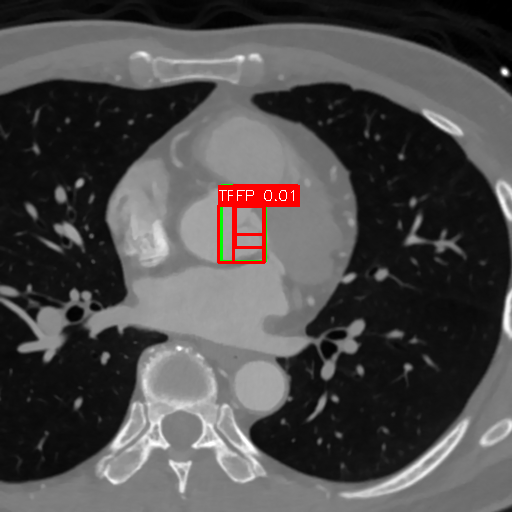


📸 [檢視] patient0047_0196.png | FN:False, FP:True


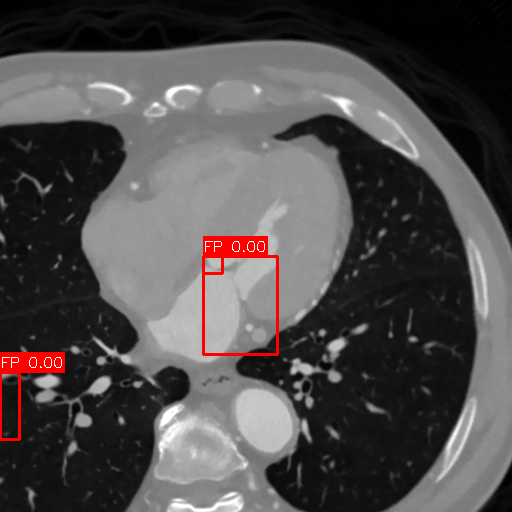


📸 [檢視] patient0046_0100.png | FN:False, FP:True


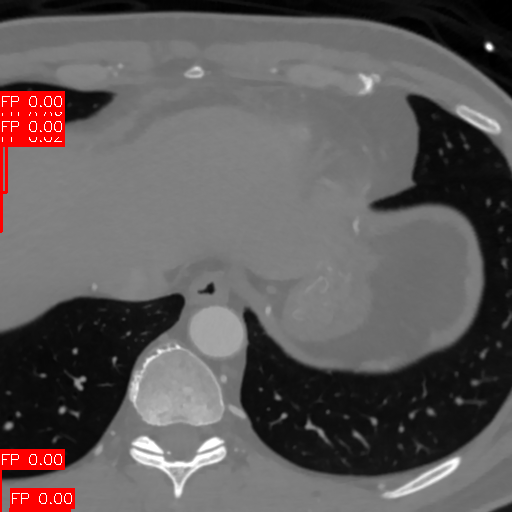


📊 正在生成分析圖表...


/tmp/ipython-input-1676403379.py:128: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recall_by_size = df.groupby('size_cat')['found'].mean()



✅ 完整報告已產生: /content/analysis_output/full_report.md
🖼️ 圖表已儲存至: /content/analysis_output/plots
🔥 熱力圖已儲存至: /content/analysis_output/visualizations/fp_heatmap.png
顯示熱力圖:


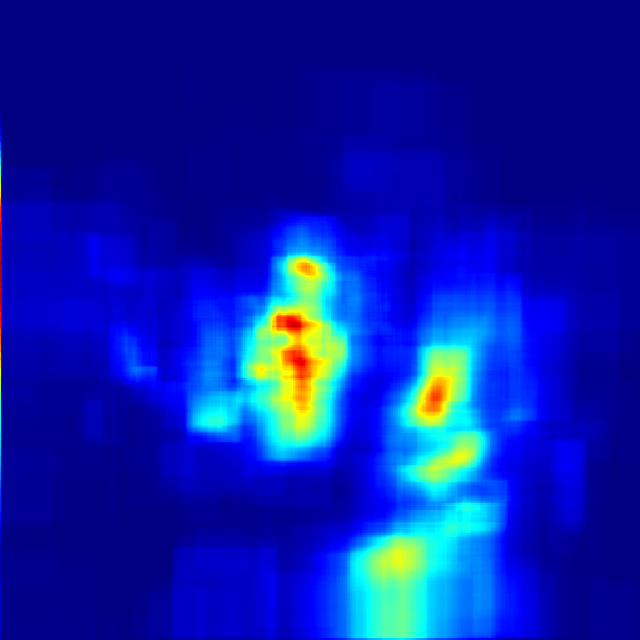

In [ ]:
import os
import cv2
import yaml
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
from datetime import datetime
from google.colab.patches import cv2_imshow

# ==========================================
# 1. 設定區域
# ==========================================
CONFIG = {
    "YAML_PATH": "/content/aortic_valve_colab.yaml",
    "TEST_IMAGES_DIR": "/content/datasets/test/images",
    "GT_LABELS_DIR": "/content/datasets/test/labels",
    "PRED_LABELS_DIR": "/content/runs/detect/val/labels",
    "OUTPUT_DIR": "/content/analysis_output",
    "IOU_THRESHOLD": 0.5,
    "MAX_DISPLAY_COLAB": 3, # 減少顯示數量以節省空間
    "HEATMAP_SIZE": (640, 640) # 用於標準化熱力圖的尺寸 (寬, 高)
}

# 顏色定義 (BGR)
COLOR_GT = (0, 255, 0)      # 綠
COLOR_PRED = (0, 0, 255)    # 紅
COLOR_FN = (0, 255, 255)    # 黃
COLOR_TEXT = (255, 255, 255)

# ==========================================
# 2. 工具函數
# ==========================================
def yolo_to_bbox(line, img_w, img_h):
    parts = list(map(float, line.strip().split()))
    if len(parts) < 5: return -1, [0, 0, 0, 0], []

    cls_id = int(parts[0])
    x_c, y_c, w, h = parts[1:5] # 強制取 4 個座標

    x1 = int((x_c - w / 2) * img_w)
    y1 = int((y_c - h / 2) * img_h)
    x2 = int((x_c + w / 2) * img_w)
    y2 = int((y_c + h / 2) * img_h)

    rest = parts[5:] if len(parts) > 5 else []
    return cls_id, [x1, y1, x2, y2], rest

def calculate_iou(box1, box2):
    x1_max = max(box1[0], box2[0])
    y1_max = max(box1[1], box2[1])
    x2_min = min(box1[2], box2[2])
    y2_min = min(box1[3], box2[3])
    inter_w = max(0, x2_min - x1_max)
    inter_h = max(0, y2_min - y1_max)
    inter_area = inter_w * inter_h
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = area1 + area2 - inter_area
    if union_area == 0: return 0
    return inter_area / union_area

def draw_box(img, box, color, label):
    h, w = img.shape[:2]
    x1, y1, x2, y2 = box
    x1, y1 = max(0, x1), max(0, y1)
    x2, y2 = min(w, x2), min(h, y2)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    # 文字背景
    (t_w, t_h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img, (x1, y1 - 20), (x1 + t_w, y1), color, -1)
    cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLOR_TEXT, 1)

# ==========================================
# 3. 繪圖與分析函數
# ==========================================
def generate_plots(stats, output_dir):
    sns.set_theme(style="whitegrid")
    plots_path = os.path.join(output_dir, "plots")
    os.makedirs(plots_path, exist_ok=True)

    generated_files = []

    # --- 1. 信心分數分佈 (Confidence Distribution) ---
    plt.figure(figsize=(10, 6))
    if stats['tp_conf_list']:
        sns.histplot(stats['tp_conf_list'], color='green', label='TP (Correct)', kde=True, bins=20, alpha=0.5, element="step")
    if stats['fp_conf_list']:
        sns.histplot(stats['fp_conf_list'], color='red', label='FP (Error)', kde=True, bins=20, alpha=0.5, element="step")

    plt.title('Confidence Score Distribution (TP vs FP)')
    plt.xlabel('Confidence Score')
    plt.ylabel('Count')
    plt.legend()
    path_conf = os.path.join(plots_path, "confidence_dist.png")
    plt.savefig(path_conf)
    plt.close()
    generated_files.append(("信心分數分佈", path_conf))

    # --- 2. IoU 分佈 (IoU Distribution) ---
    plt.figure(figsize=(10, 6))
    if stats['tp_iou_list']:
        sns.histplot(stats['tp_iou_list'], color='blue', kde=True, bins=20)
        plt.title('IoU Distribution (True Positives Only)')
        plt.xlabel('IoU')
        plt.axvline(0.5, color='r', linestyle='--', label='Threshold 0.5')
        plt.legend()
    else:
        plt.text(0.5, 0.5, "No TP Data", ha='center')

    path_iou = os.path.join(plots_path, "iou_dist.png")
    plt.savefig(path_iou)
    plt.close()
    generated_files.append(("IoU 分佈圖", path_iou))

    # --- 3. 物件大小分析 (Size Recall) ---
    plt.figure(figsize=(10, 6))
    if stats['gt_size_data']:
        df = pd.DataFrame(stats['gt_size_data']) # [{'area':..., 'found':...}]
        # 定義大小區間 (像素面積)，可根據你的圖片尺寸調整
        # 假設 640x640: 小 < 32^2 (1024), 中 < 96^2 (9216), 大 > 96^2
        bins = [0, 1024, 9216, float('inf')]
        labels = ['Small (<32px)', 'Medium (32-96px)', 'Large (>96px)']
        df['size_cat'] = pd.cut(df['area'], bins=bins, labels=labels)

        recall_by_size = df.groupby('size_cat')['found'].mean()
        ax = recall_by_size.plot(kind='bar', color=['skyblue', 'orange', 'purple'], rot=0)
        plt.title('Recall Rate by Object Size')
        plt.ylabel('Recall')
        plt.ylim(0, 1.1)

        for p in ax.patches:
            ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    else:
        plt.text(0.5, 0.5, "No GT Data", ha='center')

    path_size = os.path.join(plots_path, "size_analysis.png")
    plt.savefig(path_size)
    plt.close()
    generated_files.append(("物件大小分析", path_size))

    return generated_files

def save_heatmap(heatmap_accum, output_dir):
    # 正規化熱力圖並存檔
    if heatmap_accum is None: return None

    norm_map = cv2.normalize(heatmap_accum, None, 0, 255, cv2.NORM_MINMAX)
    norm_map = np.uint8(norm_map)
    color_map = cv2.applyColorMap(norm_map, cv2.COLORMAP_JET)

    path = os.path.join(output_dir, "visualizations", "fp_heatmap.png")
    cv2.imwrite(path, color_map)
    return path

# ==========================================
# 4. 主程式
# ==========================================
def main():
    if not os.path.exists(CONFIG["PRED_LABELS_DIR"]):
        print(f"❌ 錯誤: 找不到預測資料夾: {CONFIG['PRED_LABELS_DIR']}")
        return

    # 建立目錄
    base_viz = os.path.join(CONFIG["OUTPUT_DIR"], "visualizations")
    folders = ["all", "false_positive", "false_negative", "duplicates", "true_positive"]
    for f in folders:
        os.makedirs(os.path.join(base_viz, f), exist_ok=True)

    image_paths = []
    for ext in ['*.jpg', '*.png', '*.jpeg']:
        image_paths.extend(glob.glob(os.path.join(CONFIG["TEST_IMAGES_DIR"], ext)))

    print(f"🔍 開始分析 {len(image_paths)} 張圖片...")

    # 進階統計數據儲存容器
    stats = {
        "tp": 0, "fp": 0, "fn": 0, "dup": 0,
        "gt_total": 0, "pred_total": 0,
        "tp_iou_list": [],
        "tp_conf_list": [],      # 新增: TP 信心分數
        "fp_conf_list": [],      # 新增: FP 信心分數
        "gt_size_data": [],      # 新增: 用於大小分析 [{'area': 100, 'found': True}, ...]
        "list_fp": [], "list_fn": [], "list_dup": [], "list_tp_only": []
    }

    # 熱力圖畫布 (使用 CONFIG 設定的大小)
    heatmap_accum = np.zeros((CONFIG["HEATMAP_SIZE"][1], CONFIG["HEATMAP_SIZE"][0]), dtype=np.float32)

    displayed_count = 0

    for img_path in tqdm(image_paths):
        filename = os.path.basename(img_path)
        file_id = os.path.splitext(filename)[0]

        img = cv2.imread(img_path)
        if img is None: continue
        h, w = img.shape[:2]

        # 讀取 GT
        gt_boxes = []
        gt_path = os.path.join(CONFIG["GT_LABELS_DIR"], file_id + ".txt")
        if os.path.exists(gt_path):
            with open(gt_path, 'r') as f:
                for line in f:
                    cls, box, _ = yolo_to_bbox(line, w, h)
                    if cls != -1:
                        # 計算面積
                        area = (box[2] - box[0]) * (box[3] - box[1])
                        gt_boxes.append({"cls": cls, "box": box, "area": area, "matched": False})
        stats["gt_total"] += len(gt_boxes)

        # 讀取 Pred
        pred_boxes = []
        pred_path = os.path.join(CONFIG["PRED_LABELS_DIR"], file_id + ".txt")
        if os.path.exists(pred_path):
            with open(pred_path, 'r') as f:
                for line in f:
                    cls, box, rest = yolo_to_bbox(line, w, h)
                    if cls != -1:
                        conf = float(rest[0]) if isinstance(rest, list) and len(rest) > 0 else 1.0
                        pred_boxes.append({"cls": cls, "box": box, "conf": conf, "matched": False})
        stats["pred_total"] += len(pred_boxes)

        # === 比對邏輯 ===
        has_fp, has_fn, has_dup = False, False, False

        # 1. GT -> Pred
        for gt in gt_boxes:
            best_iou = 0
            best_idx = -1

            for i, pred in enumerate(pred_boxes):
                if pred["cls"] == gt["cls"]:
                    iou = calculate_iou(gt["box"], pred["box"])
                    if iou > best_iou:
                        best_iou = iou
                        best_idx = i

            if best_iou >= CONFIG["IOU_THRESHOLD"]:
                # 檢查重複
                overlap_count = 0
                for pred in pred_boxes:
                    if pred["cls"] == gt["cls"] and calculate_iou(gt["box"], pred["box"]) >= CONFIG["IOU_THRESHOLD"]:
                        overlap_count += 1

                if overlap_count > 1:
                    stats["dup"] += (overlap_count - 1)
                    has_dup = True

                gt["matched"] = True
                pred_boxes[best_idx]["matched"] = True
                stats["tp"] += 1
                stats["tp_iou_list"].append(best_iou)
                stats["tp_conf_list"].append(pred_boxes[best_idx]["conf"]) # 收集 TP 信心

                draw_box(img, gt["box"], COLOR_GT, "GT")
                draw_box(img, pred_boxes[best_idx]["box"], COLOR_PRED, f"TP {best_iou:.2f}")
            else:
                stats["fn"] += 1
                has_fn = True
                draw_box(img, gt["box"], COLOR_FN, "MISS")

            # 收集大小分析數據
            stats["gt_size_data"].append({'area': gt['area'], 'found': gt['matched']})

        # 2. Pred -> GT (檢查 FP)
        for pred in pred_boxes:
            if not pred["matched"]:
                stats["fp"] += 1
                has_fp = True
                stats["fp_conf_list"].append(pred["conf"]) # 收集 FP 信心
                draw_box(img, pred["box"], COLOR_PRED, f"FP {pred['conf']:.2f}")

                # --- 更新熱力圖 ---
                # 將座標歸一化後映射到熱力圖尺寸
                px1 = int(pred["box"][0] / w * CONFIG["HEATMAP_SIZE"][0])
                py1 = int(pred["box"][1] / h * CONFIG["HEATMAP_SIZE"][1])
                px2 = int(pred["box"][2] / w * CONFIG["HEATMAP_SIZE"][0])
                py2 = int(pred["box"][3] / h * CONFIG["HEATMAP_SIZE"][1])
                # 防止出界
                px1, py1 = max(0, px1), max(0, py1)
                px2, py2 = min(CONFIG["HEATMAP_SIZE"][0], px2), min(CONFIG["HEATMAP_SIZE"][1], py2)

                heatmap_accum[py1:py2, px1:px2] += 1

        # === 輸出 ===
        # 這裡為了效率，只存有問題的圖片和 TP 完美的圖片，All 資料夾依舊存
        cv2.imwrite(os.path.join(base_viz, "all", filename), img)

        if has_fp:
            cv2.imwrite(os.path.join(base_viz, "false_positive", filename), img)
            stats["list_fp"].append(filename)
        if has_fn:
            cv2.imwrite(os.path.join(base_viz, "false_negative", filename), img)
            stats["list_fn"].append(filename)
        if has_dup:
            cv2.imwrite(os.path.join(base_viz, "duplicates", filename), img)
            stats["list_dup"].append(filename)

        is_tp_only = (len(gt_boxes) > 0) and (not has_fp) and (not has_fn) and (not has_dup)
        if is_tp_only:
            cv2.imwrite(os.path.join(base_viz, "true_positive", filename), img)
            stats["list_tp_only"].append(filename)

        if (has_fp or has_fn) and displayed_count < CONFIG["MAX_DISPLAY_COLAB"]:
            print(f"\n📸 [檢視] {filename} | FN:{has_fn}, FP:{has_fp}")
            cv2_imshow(img)
            displayed_count += 1

    # ==========================================
    # 5. 生成圖表與報告
    # ==========================================
    print("\n📊 正在生成分析圖表...")
    chart_files = generate_plots(stats, CONFIG["OUTPUT_DIR"])
    heatmap_path = save_heatmap(heatmap_accum, CONFIG["OUTPUT_DIR"])

    avg_tp_iou = np.mean(stats["tp_iou_list"]) if stats["tp_iou_list"] else 0

    def get_list_str(file_list):
        if not file_list: return "無"
        shown = file_list[:5]
        s = ", ".join(shown)
        if len(file_list) > 5: s += " ..."
        return s

    report = []
    report.append("# YOLO 全方位評估報告\n")
    report.append(f"產生時間: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    report.append(f"IoU 閾值: {CONFIG['IOU_THRESHOLD']} | 影像數量: {len(image_paths)}\n")

    report.append("## 1. 基礎統計")
    report.append(f"- **GT 總數**: {stats['gt_total']} | **預測總數**: {stats['pred_total']}")
    report.append(f"- **TP (正確)**: {stats['tp']} (Avg IoU: {avg_tp_iou:.4f})")
    report.append(f"- **FP (誤檢)**: {stats['fp']}")
    report.append(f"- **FN (漏檢)**: {stats['fn']}")
    report.append(f"- **Dup (重複)**: {stats['dup']}\n")

    report.append("## 2. 進階圖表分析")
    for title, path in chart_files:
        report.append(f"### {title}")
        report.append(f"![{title}]({path})\n") # Markdown 圖片語法

    if heatmap_path:
        report.append("### 誤檢熱力圖 (False Positive Heatmap)")
        report.append("紅色區域代表模型最常在這些位置產生誤判。")
        report.append(f"![FP Heatmap]({heatmap_path})\n")

    report.append("## 3. 風險影像清單")
    report.append(f"- 含 FP: {get_list_str(stats['list_fp'])}")
    report.append(f"- 含 FN: {get_list_str(stats['list_fn'])}")
    report.append(f"- 多框: {get_list_str(stats['list_dup'])}\n")

    report_path = os.path.join(CONFIG["OUTPUT_DIR"], "full_report.md")
    with open(report_path, "w", encoding="utf-8") as f:
        f.write("\n".join(report))

    print(f"\n✅ 完整報告已產生: {report_path}")
    print(f"🖼️ 圖表已儲存至: {os.path.join(CONFIG['OUTPUT_DIR'], 'plots')}")
    if heatmap_path:
        print(f"🔥 熱力圖已儲存至: {heatmap_path}")
        print("顯示熱力圖:")
        cv2_imshow(cv2.imread(heatmap_path))

if __name__ == "__main__":
    main()

In [ ]:
import shutil
from google.colab import files
import os

output_base_dir = '/content/analysis_output'

# 1. 下載 full_report.md
report_path = os.path.join(output_base_dir, 'full_report.md')
if os.path.exists(report_path):
    print(f"Downloading {os.path.basename(report_path)}...")
    files.download(report_path)
else:
    print(f"File not found: {report_path}")

# 2. 壓縮並下載 plots 資料夾
plots_dir = os.path.join(output_base_dir, 'plots')
plots_zip_filename = 'analysis_plots.zip'
if os.path.exists(plots_dir):
    print(f"Zipping and downloading {os.path.basename(plots_dir)}...")
    shutil.make_archive(plots_zip_filename.replace('.zip', ''), 'zip', plots_dir)
    files.download(plots_zip_filename)
else:
    print(f"Directory not found: {plots_dir}")

# 3. 下載 fp_heatmap.png
heatmap_path = os.path.join(output_base_dir, 'visualizations', 'fp_heatmap.png')
if os.path.exists(heatmap_path):
    print(f"Downloading {os.path.basename(heatmap_path)}...")
    files.download(heatmap_path)
else:
    print(f"File not found: {heatmap_path}")

print("所有指定檔案的下載程序已啟動。")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Zipping and downloading plots...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

所有指定檔案的下載程序已啟動。
